In [1]:
import glob,os,functools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import seaborn as sns
from scipy.stats import *

In [2]:
files = glob.glob('/oak/stanford/groups/mrivas/projects/degas-risk/scorefiles/v2/results/*_nonCenter_*_20200427_*.tsv')
print('\n'.join(map(os.path.basename,files)))

all_beta_nonCenter_p00001_20200427_500PCs.spearmanr.tsv
all_beta_nonCenter_p1e-06_20200427_500PCs.spearmanr.tsv
all_beta_nonCenter_p00001_20200427_100PCs.spearmanr.tsv
all_beta_nonCenter_p1e-06_20200427_300PCs.spearmanr.tsv
all_beta_nonCenter_p0001_20200427_100PCs.spearmanr.tsv
all_beta_nonCenter_p001_20200427_500PCs.spearmanr.tsv
all_beta_nonCenter_p00001_20200427_300PCs.spearmanr.tsv
all_beta_nonCenter_p0001_20200427_300PCs.spearmanr.tsv
all_beta_nonCenter_p1e-05_20200427_300PCs.spearmanr.tsv
all_beta_nonCenter_p001_20200427_100PCs.spearmanr.tsv
all_beta_nonCenter_p001_20200427_300PCs.spearmanr.tsv
all_beta_nonCenter_p1e-05_20200427_100PCs.spearmanr.tsv
all_beta_nonCenter_p0001_20200427_500PCs.spearmanr.tsv
all_beta_nonCenter_p1e-05_20200427_500PCs.spearmanr.tsv
all_beta_nonCenter_p1e-06_20200427_100PCs.spearmanr.tsv


In [3]:
kind='RAW'
datas = dict([(os.path.basename(f)[4:-14].replace('_20200427','').replace('_nonCenter','').replace('Cs','C'),
               pd.read_table(f, index_col=0, usecols=['PHE','TRAIN_'+kind,'TEST_'+kind])) for f in files])

In [10]:
train=pd.DataFrame(functools.reduce(lambda x,y:pd.merge(x,y,left_index=True,right_index=True),
                                    [datas[ds]['TRAIN_'+kind] for ds in datas]))
train.columns=[ds for ds in datas]
train.head()

,beta_p00001_500PC,beta_p1e-06_500PC,beta_p00001_100PC,beta_p1e-06_300PC,beta_p0001_100PC,beta_p001_500PC,beta_p00001_300PC,beta_p0001_300PC,beta_p1e-05_300PC,beta_p001_100PC,beta_p001_300PC,beta_p1e-05_100PC,beta_p0001_500PC,beta_p1e-05_500PC,beta_p1e-06_100PC
PHE,,,,,,,,,,,,,,,
BIN1210,-0.000471,-0.006874,-0.000193,-0.007075,0.004418,0.014101,-0.000358,0.003260,-0.008248,0.012788,0.014201,-0.008464,0.003068,-0.008155,0.003473
BIN1677,0.002354,-0.009337,-0.005255,0.007143,-0.006061,0.011678,-0.006344,-0.004425,-0.003141,-0.007713,0.011391,-0.006256,0.012099,0.002767,0.007889
BIN1920,0.007473,0.021694,0.007901,0.021577,0.008915,0.022635,0.007620,0.008671,0.006828,0.021008,0.022627,0.006520,0.008666,0.007024,0.019795
BIN1930,0.010344,0.008439,0.010984,0.008390,0.002730,0.013335,0.010591,0.002130,0.008038,0.014537,0.013408,0.008319,0.002139,0.007949,0.008405
BIN1940,0.005498,0.013492,0.005765,0.013436,0.007442,0.022871,0.005685,0.006871,0.003800,0.023479,0.023010,0.004469,0.006715,0.003878,0.012347


In [11]:
test=pd.DataFrame(functools.reduce(lambda x,y:pd.merge(x,y,left_index=True,right_index=True),
                                    [datas[ds]['TRAIN_'+kind] for ds in datas]))
test.columns=[ds for ds in datas]
test.head()

,beta_p00001_500PC,beta_p1e-06_500PC,beta_p00001_100PC,beta_p1e-06_300PC,beta_p0001_100PC,beta_p001_500PC,beta_p00001_300PC,beta_p0001_300PC,beta_p1e-05_300PC,beta_p001_100PC,beta_p001_300PC,beta_p1e-05_100PC,beta_p0001_500PC,beta_p1e-05_500PC,beta_p1e-06_100PC
PHE,,,,,,,,,,,,,,,
BIN1210,-0.000471,-0.006874,-0.000193,-0.007075,0.004418,0.014101,-0.000358,0.003260,-0.008248,0.012788,0.014201,-0.008464,0.003068,-0.008155,0.003473
BIN1677,0.002354,-0.009337,-0.005255,0.007143,-0.006061,0.011678,-0.006344,-0.004425,-0.003141,-0.007713,0.011391,-0.006256,0.012099,0.002767,0.007889
BIN1920,0.007473,0.021694,0.007901,0.021577,0.008915,0.022635,0.007620,0.008671,0.006828,0.021008,0.022627,0.006520,0.008666,0.007024,0.019795
BIN1930,0.010344,0.008439,0.010984,0.008390,0.002730,0.013335,0.010591,0.002130,0.008038,0.014537,0.013408,0.008319,0.002139,0.007949,0.008405
BIN1940,0.005498,0.013492,0.005765,0.013436,0.007442,0.022871,0.005685,0.006871,0.003800,0.023479,0.023010,0.004469,0.006715,0.003878,0.012347


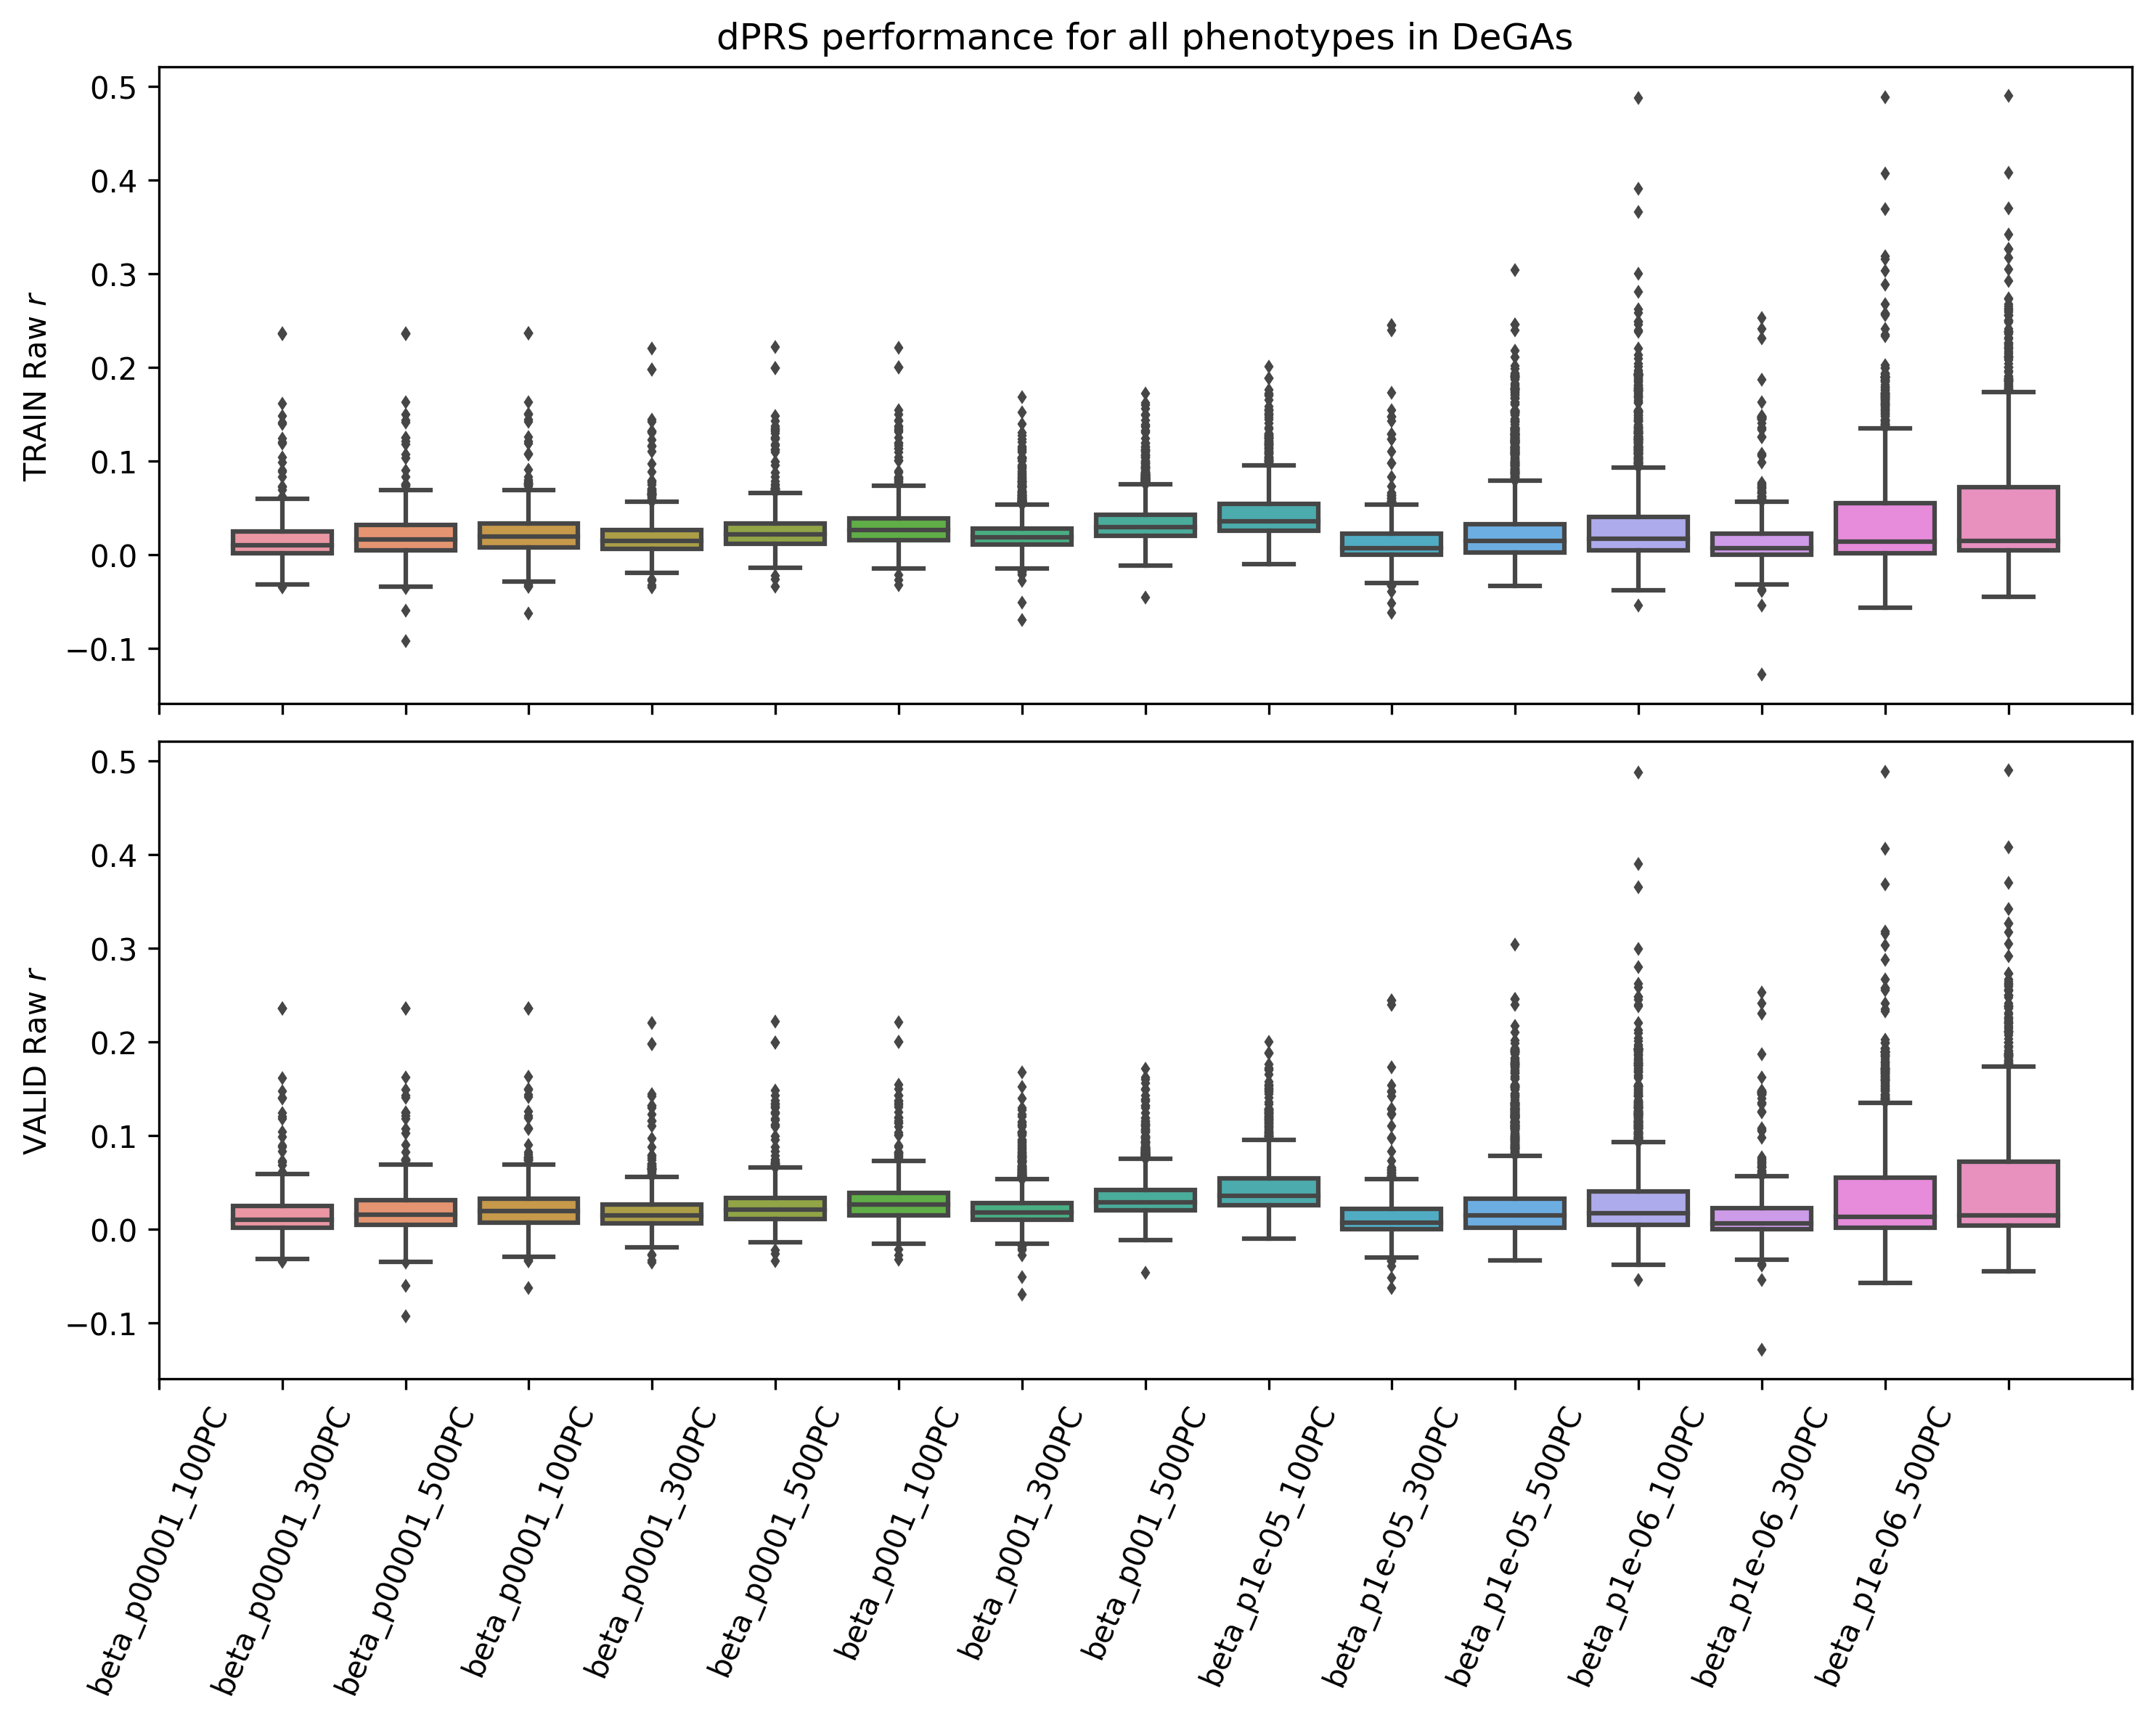

In [12]:
fig=plt.figure(figsize=(10,8),dpi=300)

# train
ax=plt.subplot(211)
sns.boxplot(x='dataset',y='rsq',
            data=train.melt(var_name='dataset',value_name='rsq').sort_values('dataset'),
            fliersize=2, ax=ax)
ax.set_xticks(list(range(-1,len(files)+1)))
ax.set_xticklabels(['' for _ in ax.get_xticklabels()])
ax.set_xlabel('')
ax.set_ylabel(' '.join(['TRAIN',kind.lower().capitalize(),'$r$']))
plt.title('dPRS performance for all phenotypes in DeGAs')

# valid
ax=plt.subplot(212)
sns.boxplot(x='dataset',y='rsq',
            data=test.melt(var_name='dataset',value_name='rsq').sort_values('dataset'),
            fliersize=2, ax=ax)
            #showfliers=0, ax=ax)
ax.set_xticks(list(range(-1,len(files)+1)))
ax.set_xticklabels(map(lambda s:'**'+s if s=='z_p001_300PC' else s, 
                       map(lambda i:str(i.get_text()), ax.get_xticklabels())), rotation=67)
ax.set_xlabel('')
ax.set_ylabel(' '.join(['VALID',kind.lower().capitalize(),'$r$']))
fig.tight_layout()
plt.show()

In [13]:
test.mean().sort_values()[::-1]

beta_p1e-06_500PC    0.045321
beta_p001_500PC      0.042515
beta_p1e-06_300PC    0.036796
beta_p001_300PC      0.034664
beta_p1e-05_500PC    0.034378
beta_p0001_500PC     0.029288
beta_p1e-05_300PC    0.028808
beta_p0001_300PC     0.024971
beta_p001_100PC      0.021887
beta_p00001_500PC    0.021110
beta_p00001_300PC    0.018501
beta_p0001_100PC     0.017836
beta_p00001_100PC    0.014344
beta_p1e-06_100PC    0.013992
beta_p1e-05_100PC    0.012539
dtype: float64

In [14]:
wilcoxon(test[test.mean().sort_values()[::-1].index[0]], 
         test[test.mean().sort_values()[::-1].index[1]])

/share/software/user/open/py-scipy/1.1.0_py36/lib/python3.6/site-packages/scipy/stats/morestats.py:2391: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/share/software/user/open/py-scipy/1.1.0_py36/lib/python3.6/site-packages/scipy/stats/morestats.py:2392: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


WilcoxonResult(statistic=502414.0, pvalue=1.152748551843431e-29)

In [16]:
datas['beta_p1e-06_500PC'].sort_values('TRAIN_'+kind).dropna()[::-1].head()

,TRAIN_RAW,TEST_RAW
PHE,,
INI20030790,0.489986,0.503037
INI10030840,0.407968,0.410911
INI20030660,0.369964,0.379943
INI30100,0.341887,0.334927
QT_FC1001717,0.326419,0.325753


In [17]:
datas['beta_p1e-06_500PC'].sort_values('TEST_'+kind).dropna()[::-1].head()

,TRAIN_RAW,TEST_RAW
PHE,,
INI20030790,0.489986,0.503037
INI10030840,0.407968,0.410911
INI20030660,0.369964,0.379943
INI30100,0.341887,0.334927
QT_FC1001717,0.326419,0.325753


In [18]:
pd.DataFrame([datas[d].loc['INI21001',:] for d in datas], index=[d for d in datas]).sort_values('TEST_'+kind)[::-1]

,TRAIN_RAW,TEST_RAW
beta_p1e-06_500PC,0.163315,0.137255
beta_p1e-06_300PC,0.068662,0.050081
beta_p001_500PC,0.036252,0.027156
beta_p001_300PC,0.034243,0.025799
beta_p001_100PC,0.030379,0.022902
beta_p1e-05_500PC,0.036308,0.021682
beta_p0001_500PC,0.021717,0.014374
beta_p0001_300PC,0.019352,0.013328
beta_p1e-05_300PC,0.023291,0.012776
beta_p0001_100PC,0.017256,0.012669


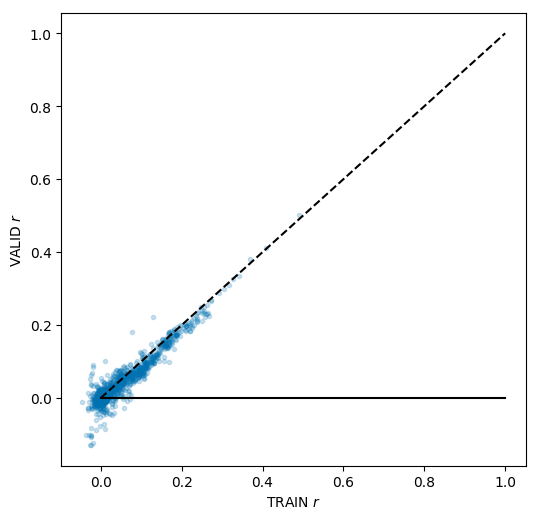

In [19]:
plt.figure(figsize=(6,6), dpi=100)
plt.plot(datas['beta_p1e-06_500PC']['TRAIN_'+kind], 
         datas['beta_p1e-06_500PC']['TEST_'+kind], '.', alpha=0.2)
plt.plot([0,1],[0,1],'k--')
plt.plot([0,1],[0,0],'k-')
plt.xlabel('TRAIN '+'$r$'), plt.ylabel('VALID '+'$r$')
plt.show()

In [20]:
npzs = glob.glob('/oak/stanford/groups/mrivas/projects/degas-risk/datasets/train/v2/tsvd/*_nonCenter_*_20200427_*500PCs.npz')
print('\n'.join(map(os.path.basename,npzs)))

all_beta_nonCenter_p0001_20200427_500PCs.npz
all_beta_nonCenter_p001_20200427_500PCs.npz
all_beta_nonCenter_p00001_20200427_500PCs.npz
all_beta_nonCenter_p1e-05_20200427_500PCs.npz
all_beta_nonCenter_p1e-06_20200427_500PCs.npz


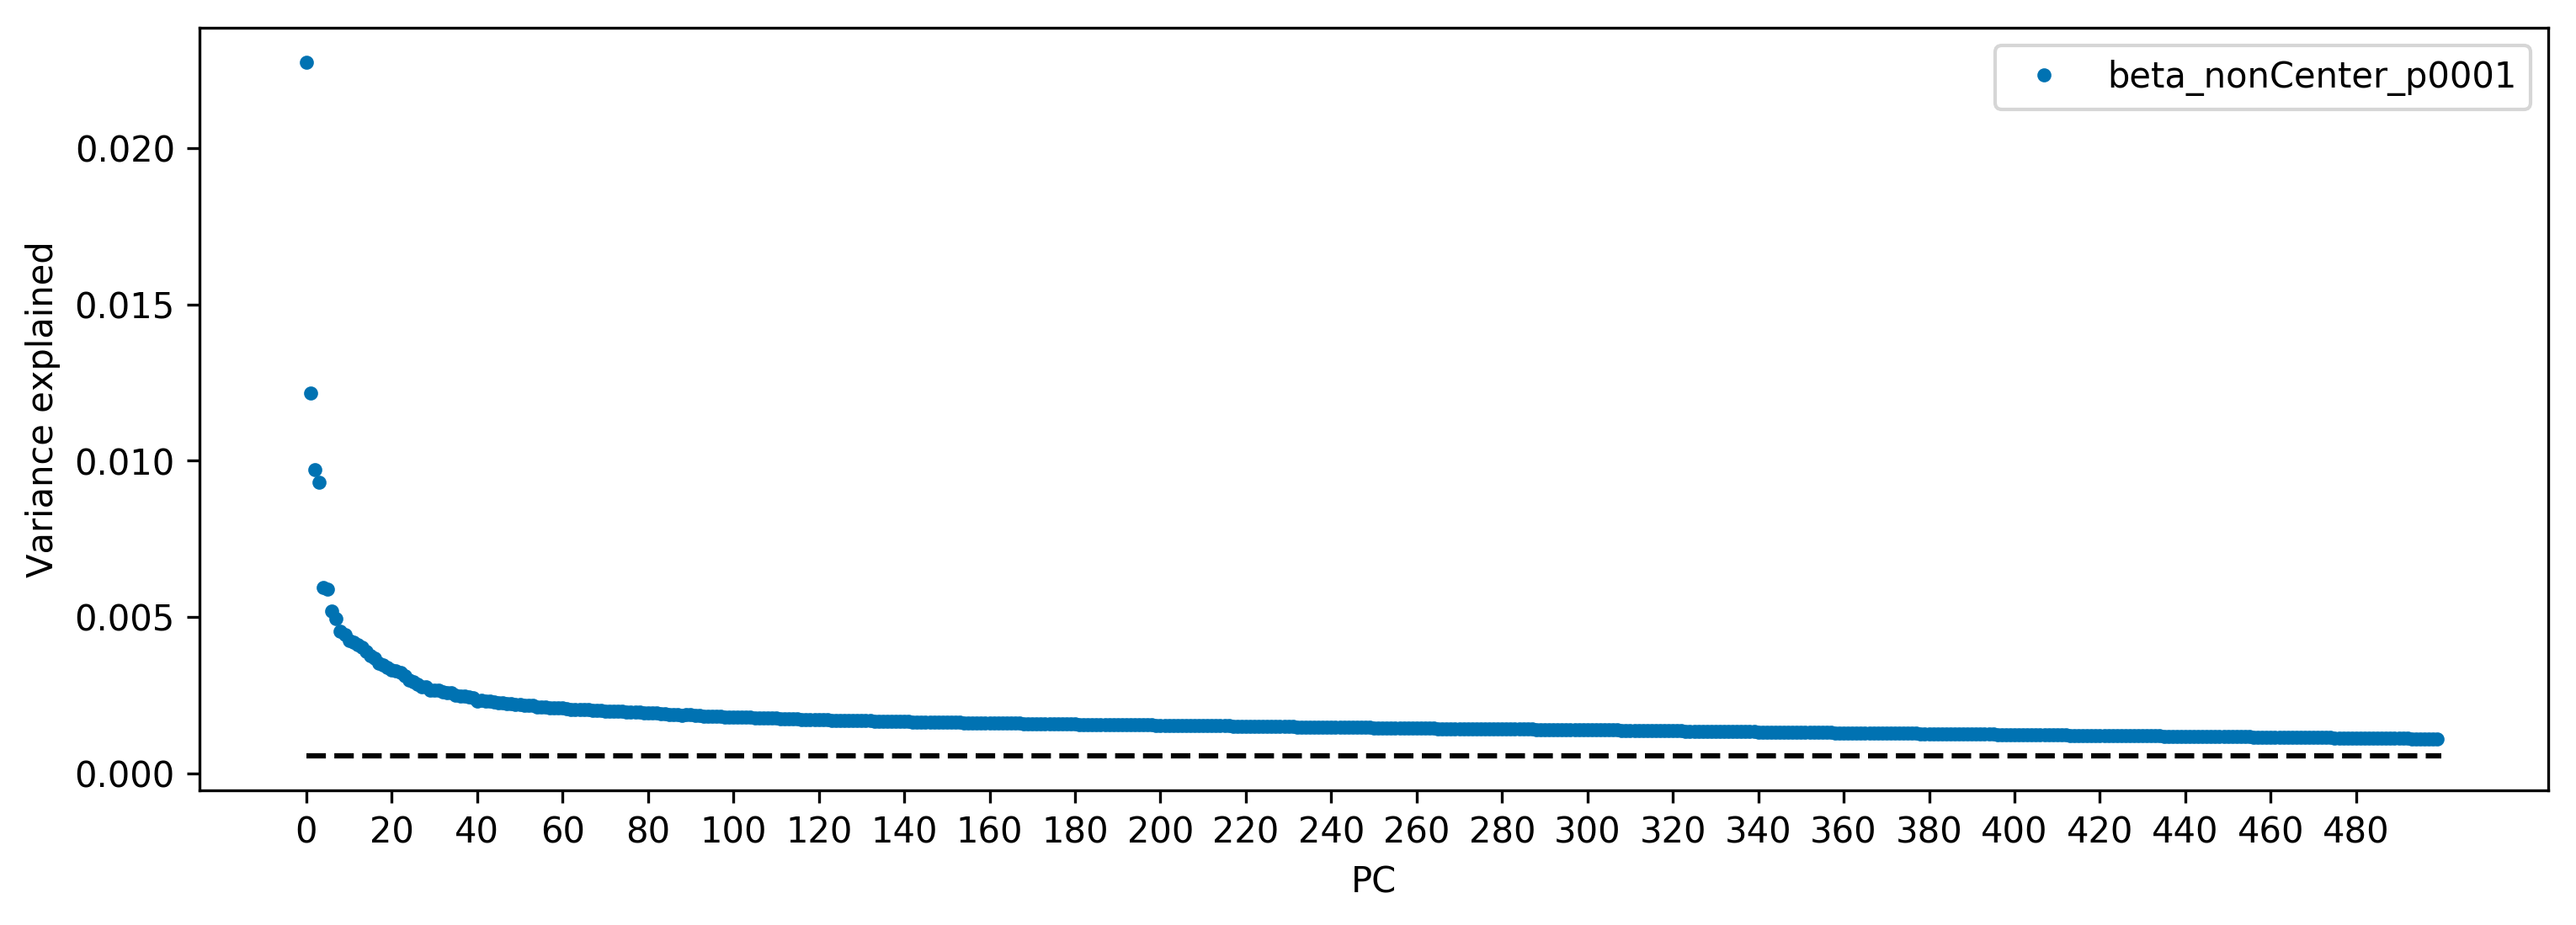

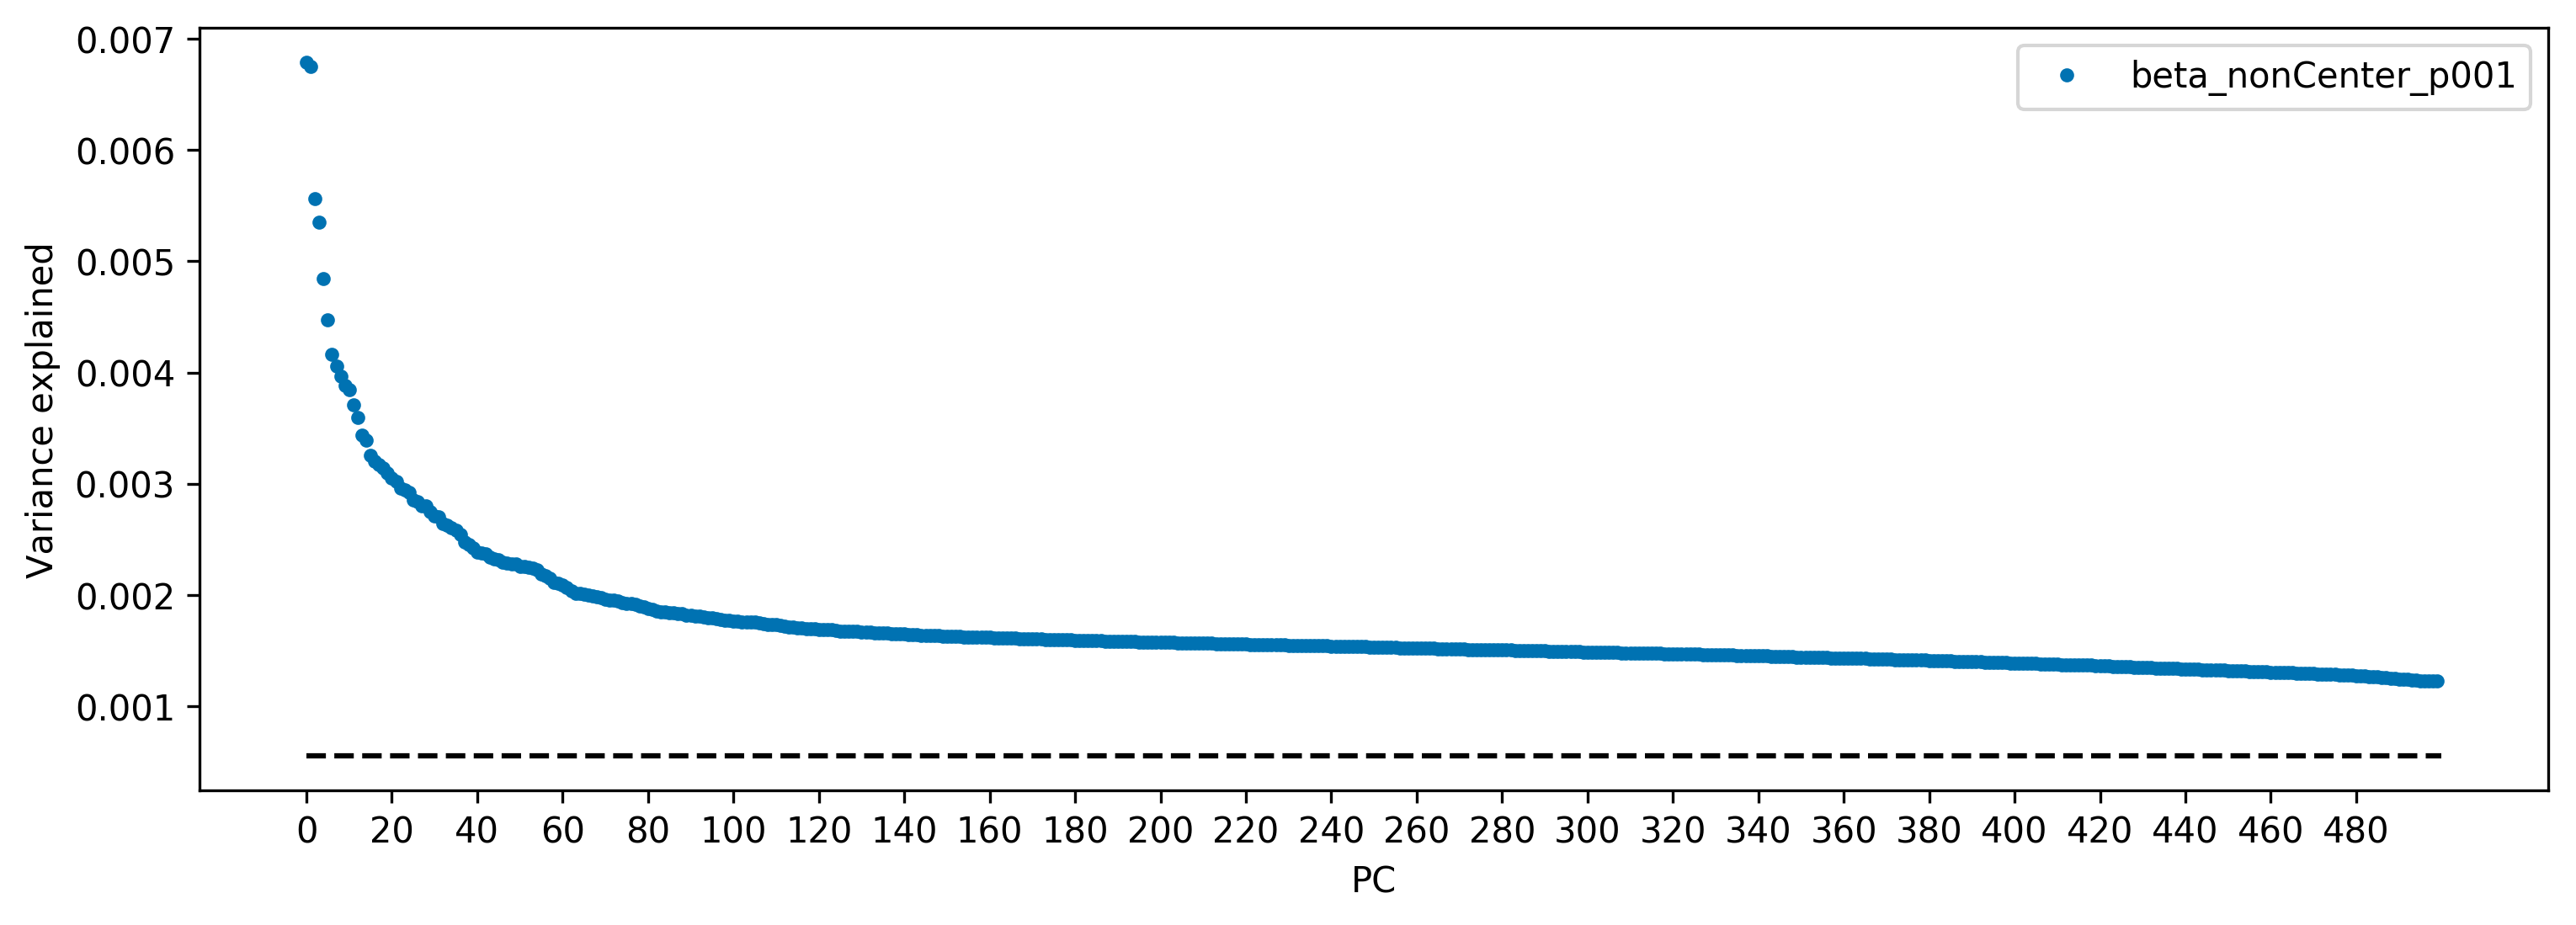

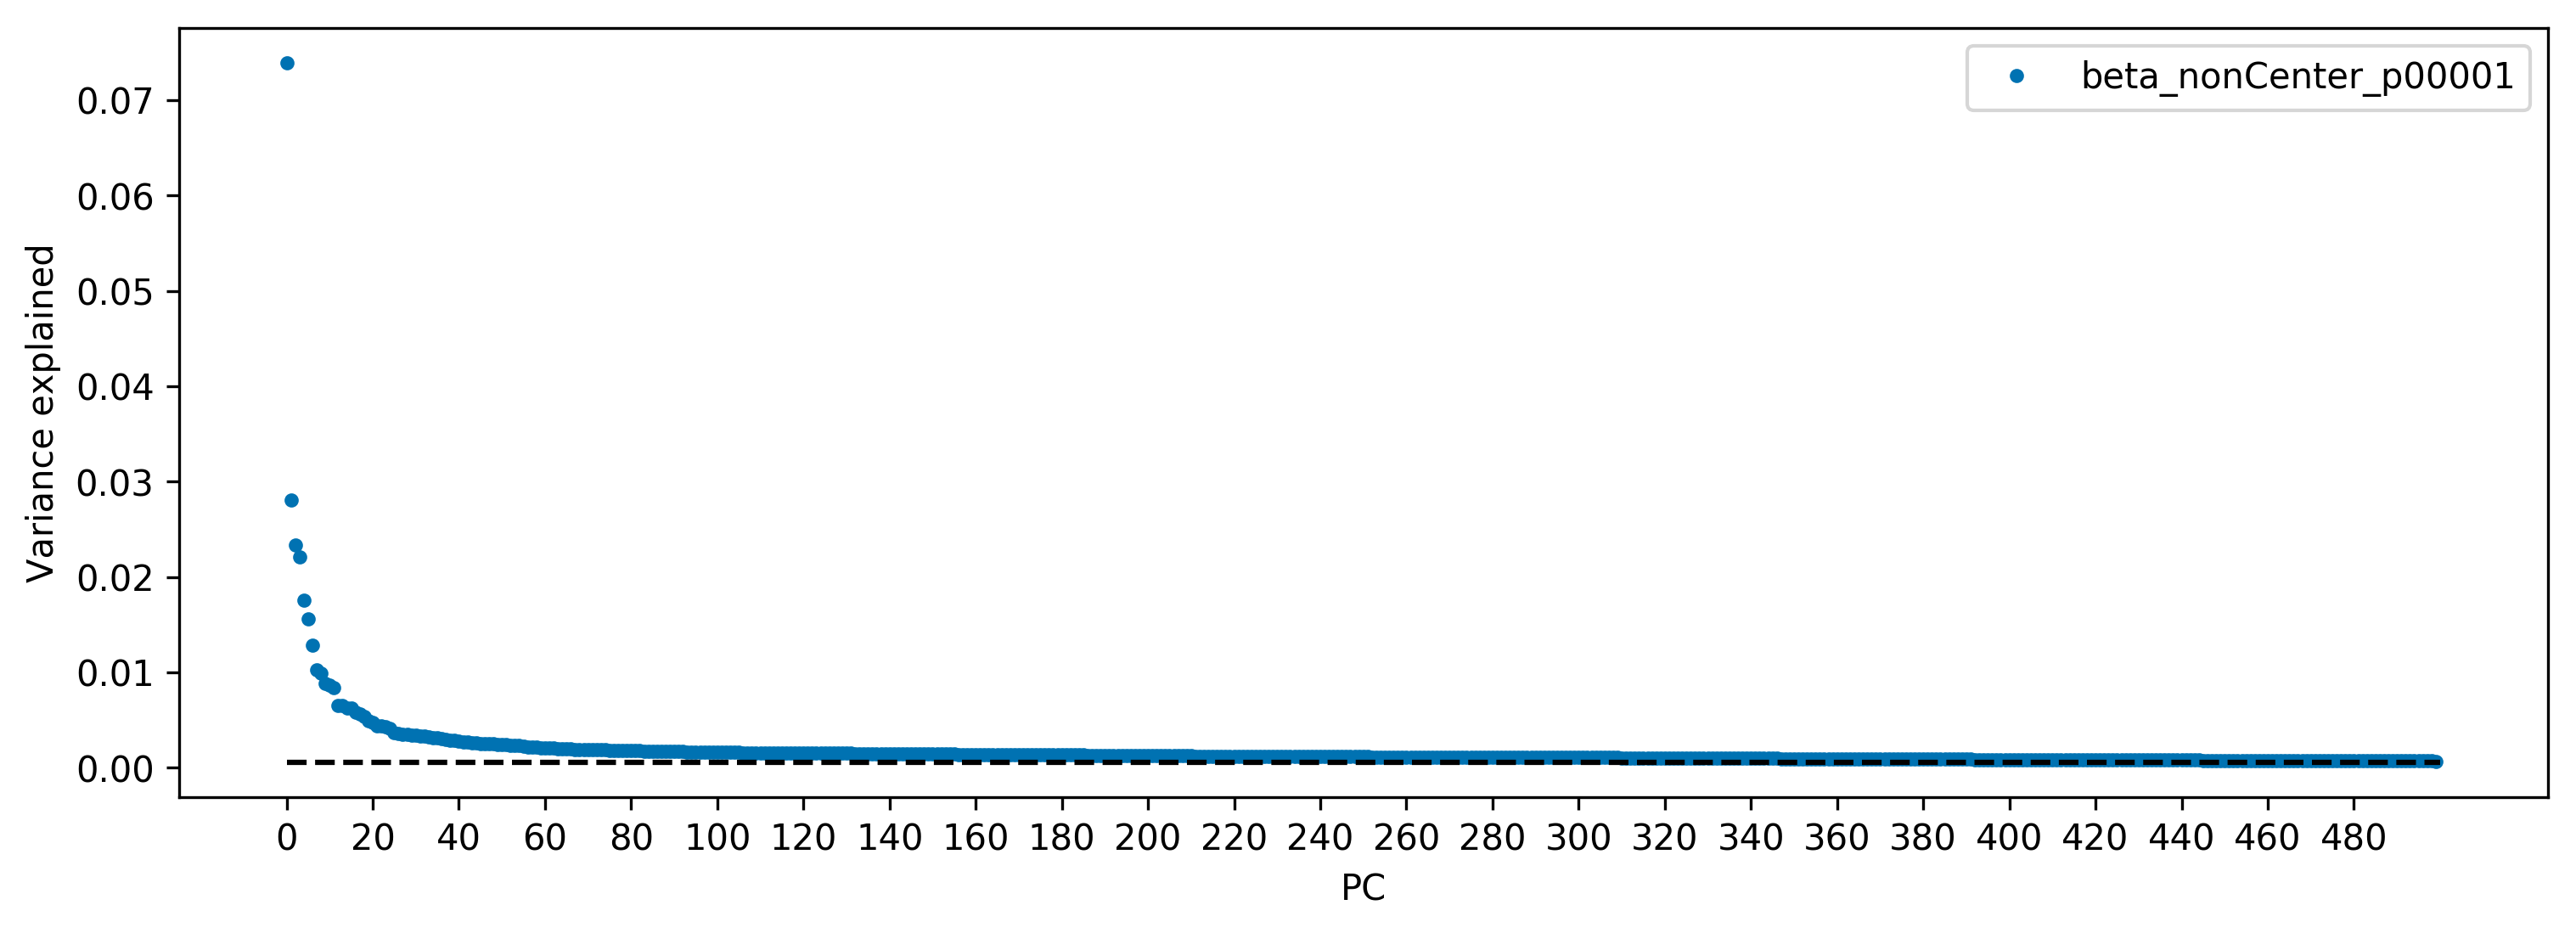

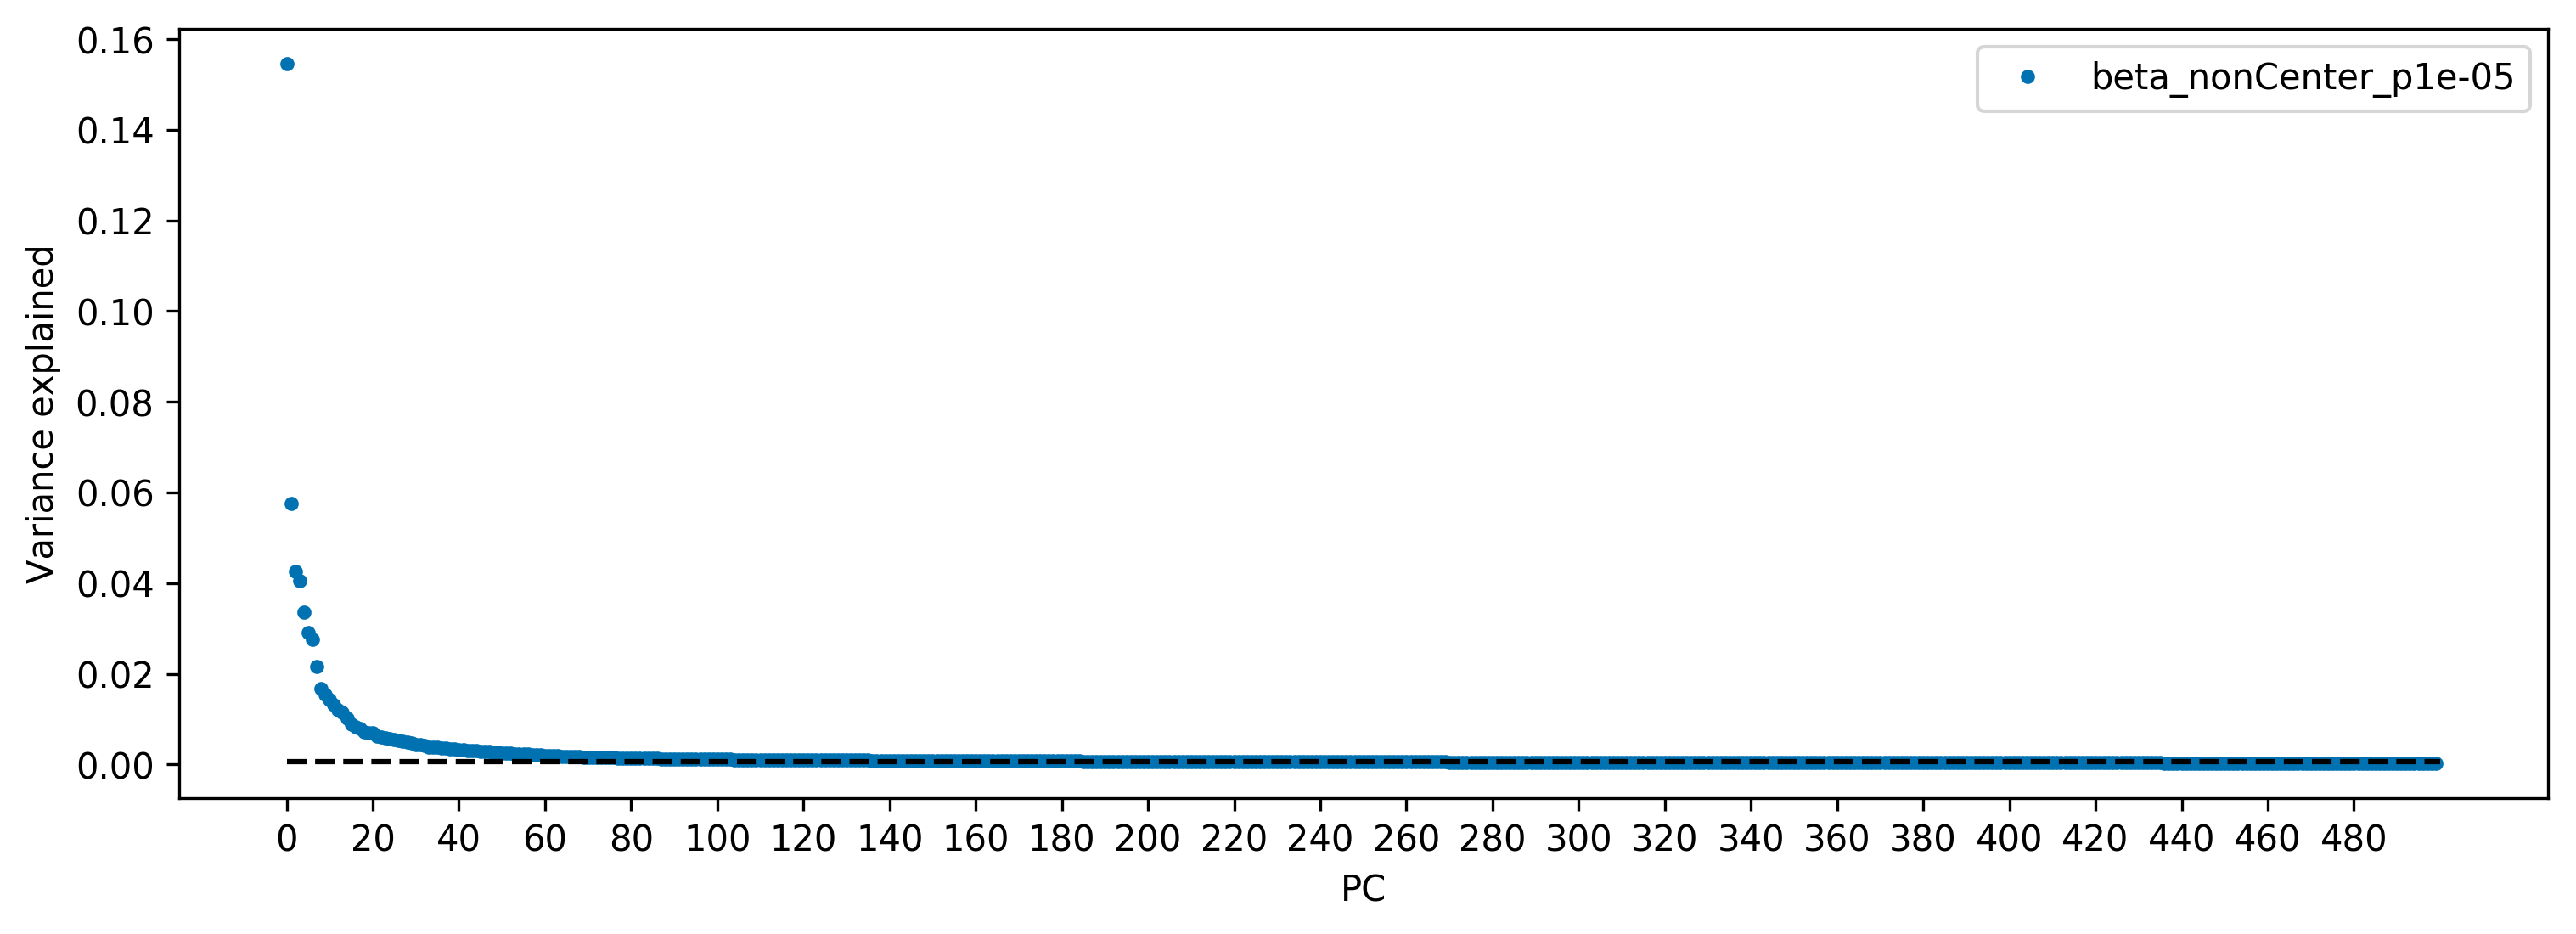

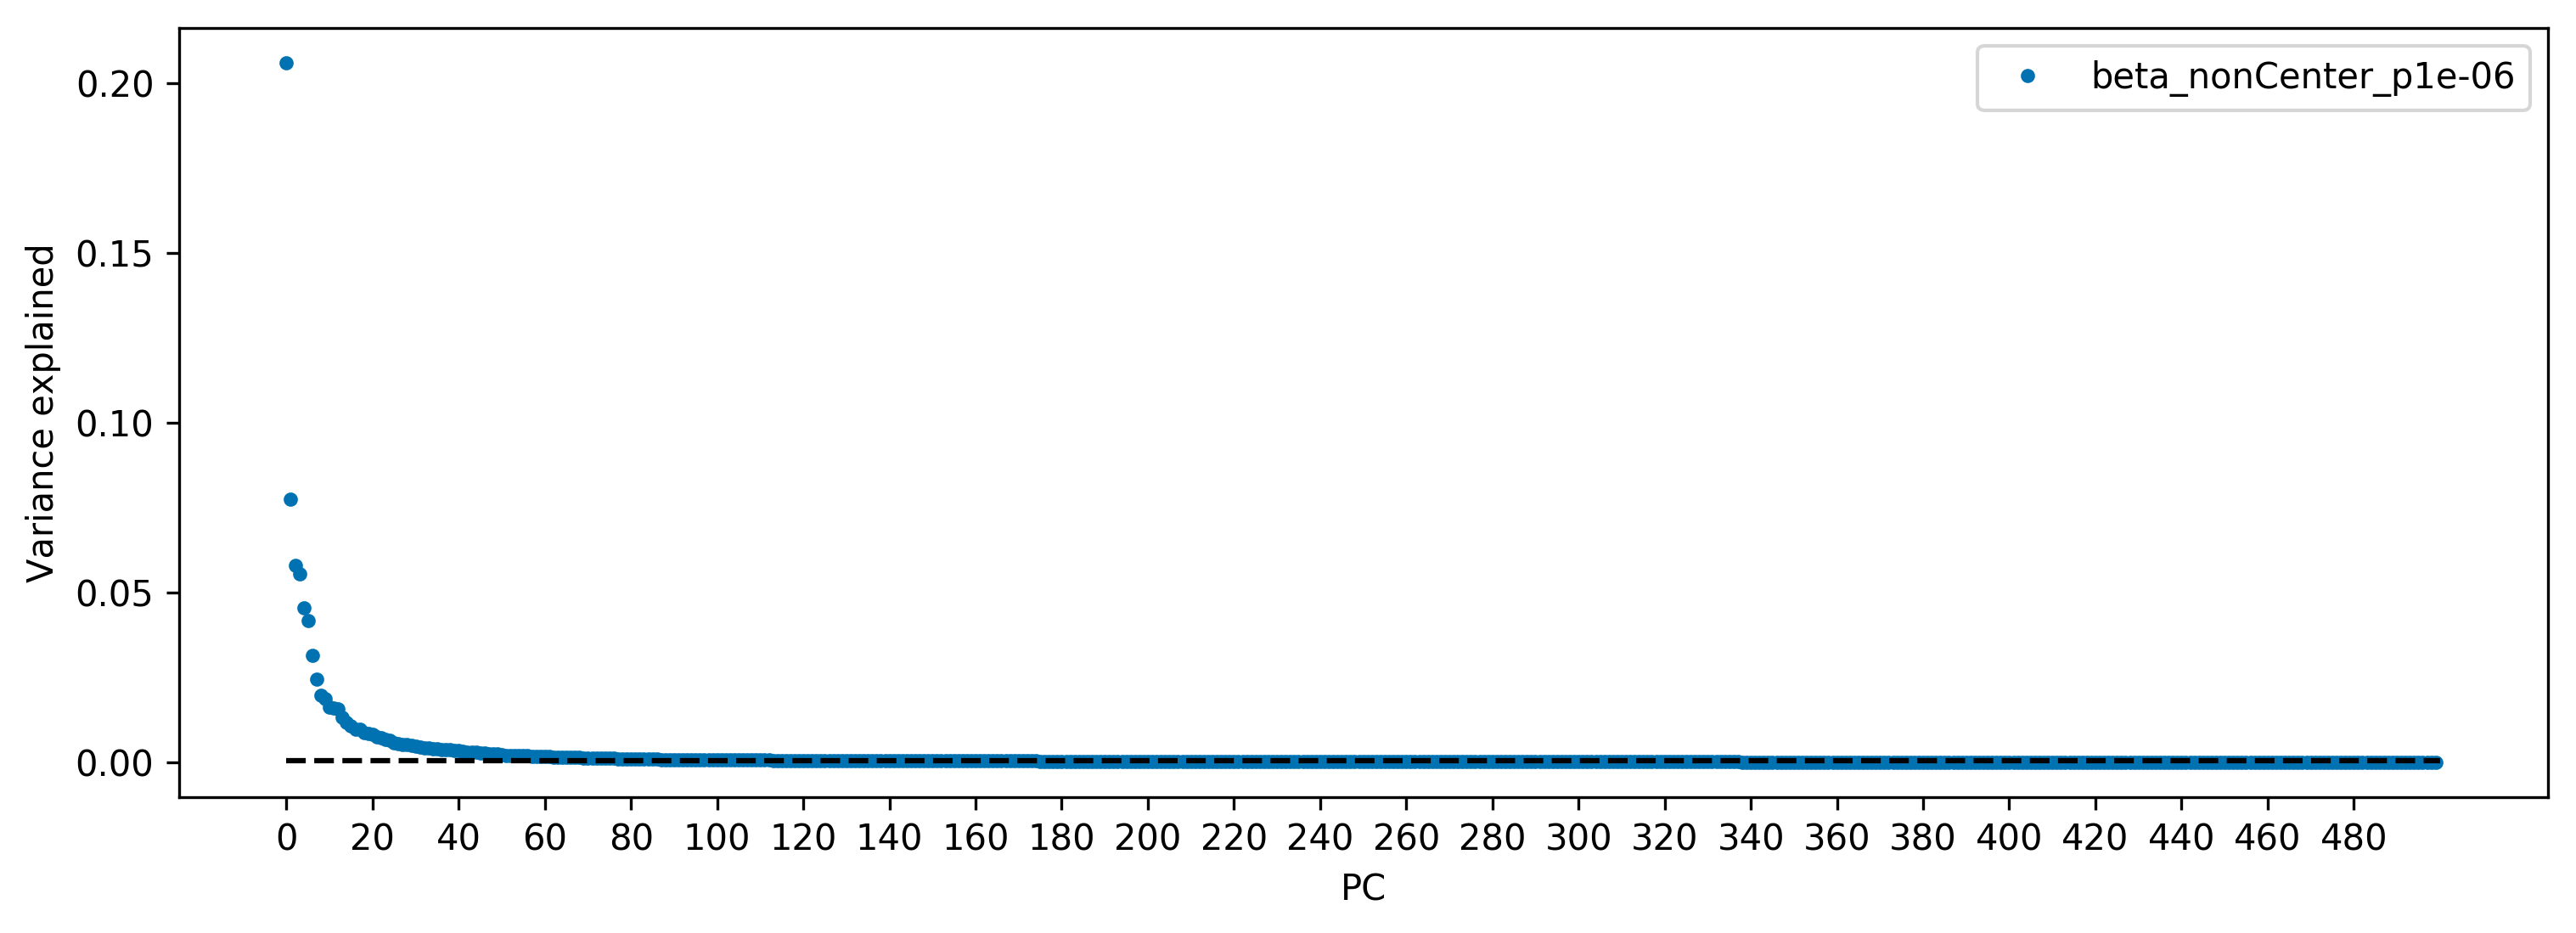

In [21]:
for npz in npzs:
    z=np.load(npz)
    plt.figure(figsize=(12,4), dpi=300)
    plt.plot(np.arange(z['D'].shape[0]), z['variance_explained_ratio'], '.')
    plt.xticks(np.arange(0,z['D'].shape[0],20))
    plt.xlabel('PC'),plt.ylabel('Variance explained')
    plt.plot([0,z['D'].shape[0]],[1.0/z['V'].shape[0],1.0/z['V'].shape[0]], 'k--')
    plt.legend([os.path.splitext(os.path.basename(npz))[0][4:-16]]) #, 'Isotropic variance'])
    plt.show()